In [26]:
import pandas as pd
import numpy as np
import zipfile
import os
import subprocess

with zipfile.ZipFile('armenian-online-job-postings.zip', 'r') as myzip:
    myzip.extractall()
    
os.listdir('./')
df = pd.read_csv('online-job-postings.csv')
df.query('IT == True' and 'Month == 1' and 'Title == "Chief Financial Officer"').count()
df.head()

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\r\nJOB TI...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\r\...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\r\...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\r\nJ...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\r\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\r\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\r\...,NaN,2004,1,False
3,Manoff Group\r\nJOB TITLE: BCC Specialist\r\n...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\r\n...,NaN,23 January 2004\r\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\r\nJOB TITLE: Software...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\r\n- CV; \...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True


In [7]:
nn = os.getcwd()
nn.split('/')[len(nn.split('/'))-2]

'jkuti'


### Tidy Data
- Each variable is a column each observation is a row.
- Each type of observational unit is a table.
- Untidy vs Messy Data

Tidy datasets provide a standardized way to link the structure of a dataset (its physical layout) with its semantics (its meaning).

### Messy data
- Column headers are values, not variable names.
- Multiple variables are stored in one column.
- Variables are stored in both rows and columns.
- Multiple types of observational units are stored in the same table.
- A single observational unit is stored in multiple tables.

##### Dot vs Bracket Notation
> Only bracket notation work in the following instances: 
- if variables start with a number e.g. 4days
- if variables have a space in them e.g four days
- if variables have a dash in them e.g four-days

In [27]:
# Get a copy of the df
df_clean = df.copy()

# Change the column names by inplacing True
df_clean.rename(columns={'ApplicationP':'ApplicationProcedure','AboutC': 'AboutCompany','RequiredQual':'RequiredQualification','JobRequirment':'JobRequirements'}, inplace=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 24 columns):
jobpost                  19001 non-null object
date                     19001 non-null object
Title                    18973 non-null object
Company                  18994 non-null object
AnnouncementCode         1208 non-null object
Term                     7676 non-null object
Eligibility              4930 non-null object
Audience                 640 non-null object
StartDate                9675 non-null object
Duration                 10798 non-null object
Location                 18969 non-null object
JobDescription           15109 non-null object
JobRequirements          16479 non-null object
RequiredQualification    18517 non-null object
Salary                   9622 non-null object
ApplicationProcedure     18941 non-null object
OpeningDate              18295 non-null object
Deadline                 18936 non-null object
Notes                    2211 non-null object
AboutC

In [33]:
df_clean['StartDate'].value_counts()
# Create a deep copy of df_clean as df_clean2 not to lose original content
df_clean2 = df_clean.copy()
clean_val = df_clean2['StartDate'].value_counts()
# convert value_count keys to array using object.keys()
asap_list = list(clean_val.keys())
asap_list
for phrase in asap_list:
    # loop through asap_list and replace every value with the word 'ASAP' using replace(...)
    df_clean.StartDate.replace(phrase, 'ASAP', inplace=True)
# Check if all values have been replaced with 'ASAP'
df_clean['StartDate'].value_counts()

ASAP    9675
Name: StartDate, dtype: int64

In [34]:
df_clean.head()

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationProcedure,OpeningDate,Deadline,Notes,AboutCompany,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\r\nJOB TI...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\r\...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\r\...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\r\nJ...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\r\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\r\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\r\...,NaN,2004,1,False
3,Manoff Group\r\nJOB TITLE: BCC Specialist\r\n...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\r\n...,NaN,23 January 2004\r\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\r\nJOB TITLE: Software...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\r\n- CV; \...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True


In [43]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 24 columns):
jobpost                  19001 non-null object
date                     19001 non-null object
Title                    18973 non-null object
Company                  18994 non-null object
AnnouncementCode         1208 non-null object
Term                     7676 non-null object
Eligibility              4930 non-null object
Audience                 640 non-null object
StartDate                9675 non-null object
Duration                 10798 non-null object
Location                 18969 non-null object
JobDescription           15109 non-null object
JobRequirements          16479 non-null object
RequiredQualification    18517 non-null object
Salary                   9622 non-null object
ApplicationProcedure     18941 non-null object
OpeningDate              18295 non-null object
Deadline                 18936 non-null object
Notes                    2211 non-null object
AboutC

In [47]:
# Using assert statements to test
# asser condition, message 
# same as below
# if not condition:
#     raise AssertionError(message)
assert 2 + 2 == 4
assert 2 + 2 == 5, "2 plus 2 is 4"

AssertionError: 2 plus 2 is 4

In [46]:
# test to see if 'ASAP' is not in 'StartDate', python should yell an assertion error at us, so the below is correct
for phrase in asap_list:
    assert phrase not in df_clean.StartDate.values

AssertionError: 

#### Wrangling vs EDA vs ETL
- EDA: Exploratory Data Analysis, an analysis approach that focuses on identifying general patterns in the data, and identifying outliers and features of the data that might not have been anticipated.
- Data wrangling: is about gathering the right pieces of data, assessing your data's quality and structure, then modifying your data to make it clean. But the assessments you make and convert to cleaning operations won't make your analysis, viz, or model better, though. 
- ETL: Extract-Transform-Load process is similar to Data Wrangling except that i.The users are different ii.The data is different iii.The use cases are different


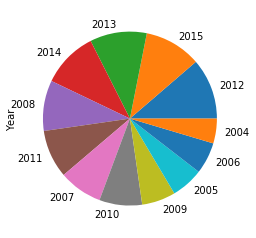

In [57]:
# Get value count for year and plot a pie chart
df_clean.Year.value_counts().plot(kind="pie");

## Gathering Data

In [ ]:
# Read tsv files
# csv
# pandas.read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer',
# names=None, index_col=None, usecols=None)


# tsv
# pandas.read_csv(filepath_or_buffer, sep='\t', delimiter=None, header='infer',
# names=None, index_col=None, usecols=None)
# or
# pd.read_csv(fpath, sep='\t') or pd.read_table(fpath).


# Web Scrapping with beautiful soup



In [1]:
import requests
page = requests.get("http://letusgetpersonal.com")
page

<Response [200]>

In [2]:
page.status_code

200

In [3]:
page.content

b'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "https://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="https://www.w3.org/1999/xhtml">\n<head><meta http-equiv="Content-Type" content="text/html; charset=windows-1252">\n\n<title>Lets Get Personal</title>\n<link rel="stylesheet" href="https://www.hostgatorsupport.com/style.css" type="text/css" />\n</head>\n\n<body>\n<h1>Website content coming soon</h1>\n<p>This site is owned by Jude</p>\n</body>\n</html>\n'

In [4]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(page.content, 'html.parser')
print(soup.prettify())


<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "https://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="https://www.w3.org/1999/xhtml">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <title>
   Lets Get Personal
  </title>
  <link href="https://www.hostgatorsupport.com/style.css" rel="stylesheet" type="text/css"/>
 </head>
 <body>
  <h1>
   Website content coming soon
  </h1>
  <p>
   This site is owned by Jude
  </p>
 </body>
</html>



In [6]:
list(soup.children)

['html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "https://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd"',
 '\n',
 <html xmlns="https://www.w3.org/1999/xhtml">
 <head><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
 <title>Lets Get Personal</title>
 <link href="https://www.hostgatorsupport.com/style.css" rel="stylesheet" type="text/css"/>
 </head>
 <body>
 <h1>Website content coming soon</h1>
 <p>This site is owned by Jude</p>
 </body>
 </html>,
 '\n']

In [7]:
# list manipulation to check items
[type(item) for item in list(soup.children)]

[bs4.element.Doctype,
 bs4.element.NavigableString,
 bs4.element.Tag,
 bs4.element.NavigableString]

In [8]:
# get only the html content
html = list(soup.children)[2]
html

<html xmlns="https://www.w3.org/1999/xhtml">
<head><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<title>Lets Get Personal</title>
<link href="https://www.hostgatorsupport.com/style.css" rel="stylesheet" type="text/css"/>
</head>
<body>
<h1>Website content coming soon</h1>
<p>This site is owned by Jude</p>
</body>
</html>

In [9]:
# put the children of html in a list
list(html.children)

['\n',
 <head><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
 <title>Lets Get Personal</title>
 <link href="https://www.hostgatorsupport.com/style.css" rel="stylesheet" type="text/css"/>
 </head>,
 '\n',
 <body>
 <h1>Website content coming soon</h1>
 <p>This site is owned by Jude</p>
 </body>,
 '\n']

In [10]:
# get body content
body = list(html.children)[3]
body

<body>
<h1>Website content coming soon</h1>
<p>This site is owned by Jude</p>
</body>

In [11]:
h1 = list(body.children)[1]
h1

<h1>Website content coming soon</h1>

In [12]:
h1.get_text()

'Website content coming soon'

##### Change git repo with set-url
> git remote -v # to check remote name
> git remote set-url origin https://github.com/USERNAME/REPOSITORY.git
> git remote -v # verify that remote has been set right

In [15]:
#### Search all instances at once
sei = requests.get('https://www.sei-mi.com')
sei

<Response [200]>